# Clustering in Python

# 1. Importing data and libraries

# 2. The elbow technique

# 3. k-means clustering

# 4. Descriptive Statistics

# 1. Importing data and libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl 

In [2]:
# Creating path to import data

path = r'C:\Users\srira\OneDrive\Documents\Project 6'

In [3]:
# Importing data jobs_salaries.csv
df_sal = pd.read_csv(os.path.join(path, 'Prepared Data', 'jobs_salaries.csv'))

In [4]:
# Checking the dataframe

df_sal.head()

,Unnamed: 0,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# Checking the total number of rows and columns
df_sal.shape

(9355, 13)

In [6]:
# Replacing the abbreviations in the company_size column

cs = {'S' : 'Small',
       'M' : 'Medium',
       'L' : 'Large'}

df_sal['company_size'] = df_sal['company_size'].replace(cs)

In [9]:
# Drop the columns that are not needed

df_sal = df_sal.drop(columns = ['Unnamed: 0'])

In [10]:
df_sal.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,Large
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,Medium
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,Medium
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,Medium
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,Medium


In [11]:
# Creating a subset with the required columnns

df = df_sal[['work_year', 'salary_in_usd']]

In [12]:
df

,work_year,salary_in_usd
0,2023,95012
1,2023,186000
2,2023,81800
3,2023,212000
4,2023,93300
...,...,...
9350,2021,165000
9351,2020,412000
9352,2021,151000
9353,2020,105000


# 2. The elbow technique

In [13]:
# Defining the range of potential clusters in the data.
num_cl = range(1, 10)

# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [14]:
# Creating a score that represents a rate of variation for the given cluster option
scores = [KMeans(n_clusters=i).fit(df).score(df) for i in range(1, len(num_cl) + 1)]

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [15]:
scores

[-37335371664662.734,
 -13773493325260.441,
 -7157948220685.48,
 -4166805220442.319,
 -2849923793068.963,
 -2000547586430.7688,
 -1518635736625.0723,
 -1202121504457.8115,
 -951915132579.0565]

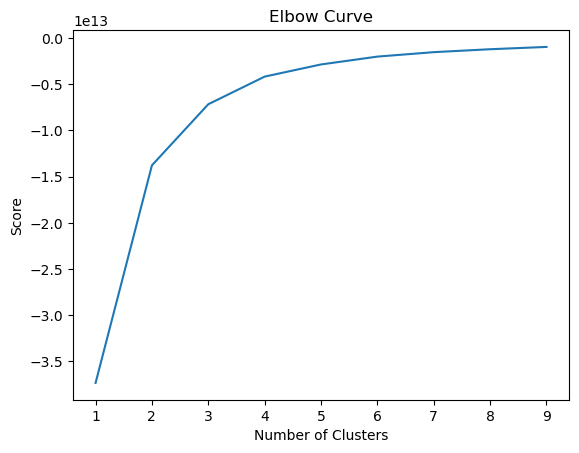

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# The curve starts to straighten out from 4 on the x-axis, indicating that the optimal count for the clusters is 4.

# 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\srira\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\srira\AppData\Local\Temp\ipykernel_12624\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [20]:
df.head()

,work_year,salary_in_usd,clusters
0,2023,95012,3
1,2023,186000,0
2,2023,81800,3
3,2023,212000,0
4,2023,93300,3


In [21]:
df['clusters'].value_counts()

clusters
1    3647
0    2619
3    2180
2     909
Name: count, dtype: int64

# Scatterplots

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


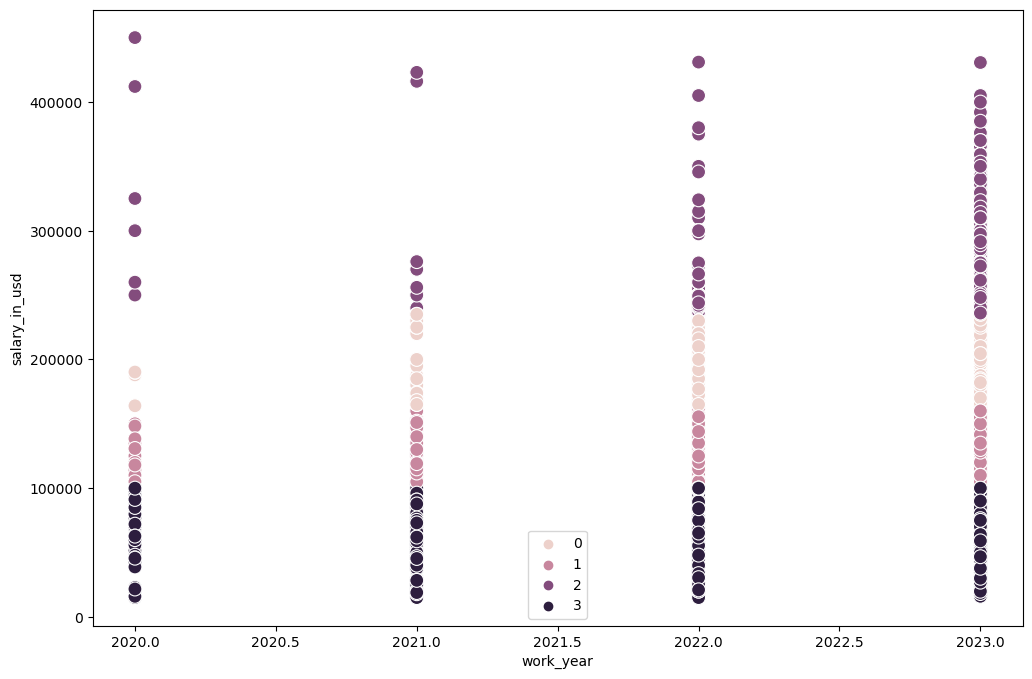

In [22]:
# Plot the clusters for the "salary_in_usd" and "work_year" variables.

plt.figure(figsize=(12,8))
# subsetting `X` for the x and y arguments to avoid using their labels. 
ax = sns.scatterplot(x=df['work_year'], y=df['salary_in_usd'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('work_year') 
plt.ylabel('salary_in_usd') 
plt.show()

# The scatterplot illustrates that there are considerably the most number of records for the year 2023. It also shows that there are more number of employees who fall in the salary range 250000 - 400000, which is represented by the purple in the year 2023. It is quite clear from the above finding that the jobs in the data science field are getting more with the number of data professionals increasing yearly, and has also seen an increase in salary over the years.

# 4. Descriptive Statistics

In [23]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\srira\AppData\Local\Temp\ipykernel_12624\648531869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
C:\Users\srira\AppData\Local\Temp\ipykernel_12624\648531869.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'


In [24]:
df.groupby('cluster').agg({'work_year':['mean', 'median'], 
                         'salary_in_usd':['mean', 'median']})

work_year          salary_in_usd          
                    mean  median           mean    median
cluster                                                  
dark purple  2022.604587  2023.0   73743.664220   75711.0
light pink   2022.820160  2023.0  193277.991982  190000.0
pink         2022.780642  2023.0  133668.487250  135000.0
purple       2022.881188  2023.0  276794.894389  261500.0

# Exporting the data

In [25]:
df_sal.to_csv(os.path.join(path, 'Prepared Data', 'data_salaries.csv'))
df.to_csv(os.path.join(path, 'Prepared Data', 'clusters.csv'))

# With the above statistics and analysis, it is clear that with the given dataset, comparatively there are less number of jobs in the data field in the year 2020 and also mostly the salary being in the range 40000 - 150000, and only a very few on a high scale. But it has been gradually increasing over the years and by looking into the mean and median for the purple, in the year 2023, its the most with the highest number of jobs, followed by light pink and a very good increase in the salary trend.

# With both the salary and the number of jobs in the data science field increasing over the years, this paves the way for the upcoming data analysts to begin their career in the data field and also for the data analysts who have been looking to change to a different role. When considering other factors such as the job_title, experience_level, employment_type and company_size with the above findings, more insights such as 
# the jobs that have become popular over the years, 
# if medium, small or large companies have offered the most number of jobs and also the average salary offered by each of them, can be inferred.


# These clusters would help to monitor the changes over time, and also helps in finding the trends and patterns in the data science jobs and salaries over the years. This cluster analysis, in general, would provide a great basis for generating new hypotheses and finding more insighte to explore the data further.